In [1]:
import pandas as pd 
import numpy as np
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = pd.read_csv('all_data.csv')

In [4]:
data.head()

,review,sentiment
0,Aditya Ingole Deaf,2
1,I love the app.! There is no issue but if u co...,1
2,"So hard to use. The web app failed, and the mo...",0
3,I hate that the app makes a sound every time s...,1
4,Useless at BSE star MF meet.voice too mych slo...,0


In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Dr-
[nltk_data]     Abdelrhman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from nltk.tokenize import RegexpTokenizer

stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')

# As this dataset is fetched from twitter so it has lots of people tag in tweets
# we will remove them 
tags = r"@\w*"


def preprocess_text(sentence, stem = True):
    sentence = tokenizer.tokenize(sentence)
    # sentence = sentence.split()

    # sentence = [re.sub(tags, "", sentence)]
    

    text = []
    # print(sentence)
    for word in sentence:
        word = word.lstrip()
        word = word.rstrip()
        word = word.replace(' ','')
        if word not in stopwords:
            
            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
                
    return tokenizer.tokenize(" ".join(text))


[nltk_data] Downloading package stopwords to C:\Users\Dr-
[nltk_data]     Abdelrhman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
print(f"Orignal Text : {data.review[11]}")
print()
print(f"Preprocessed Text : {preprocess_text(data.review[11])}")

Orignal Text : Very disappointed to know that Zoom virtual background is not supporting tablet

Preprocessed Text : ['veri', 'disappoint', 'know', 'zoom', 'virtual', 'background', 'support', 'tablet']


In [16]:
data.review = data.review.map(preprocess_text)
data.head()

,review,sentiment
0,"[aditya, ingol, deaf]",2
1,"[i, love, app, there, issu, u, could, add, fea...",1
2,"[so, hard, use, the, web, app, fail, mobil, ap...",0
3,"[i, hate, app, make, sound, everi, time, someo...",1
4,"[useless, bse, star, mf, meet, voic, mych, slo...",0


In [17]:
# vocabulary of words present in dataset
data_vocab = []
for text in data.review:
    for word in text:
        if word not in data_vocab:
            data_vocab.append(word)

In [18]:
len(data_vocab)

13399

In [20]:
from collections import Counter
import random
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.model_selection import train_test_split


x = data.review
y = data.sentiment
print(f'DATA : {x[0]}')
print(f'LABEL: {y[0]}')

DATA : ['aditya', 'ingol', 'deaf']
LABEL: 2


In [23]:
data["review"]=data["review"].apply(lambda x: " ".join(x) )
# x_test[text]=x_test[text].apply(lambda x: " ".join(x) )

In [24]:
data.head()

,review,sentiment
0,aditya ingol deaf,2
1,i love app there issu u could add featur spotl...,1
2,so hard use the web app fail mobil app made cr...,0
3,i hate app make sound everi time someon come r...,1
4,useless bse star mf meet voic mych slow cant h...,0


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=42)

In [26]:
x_train.head()

33708                                   it better zoom app
19367    can add function hide icon it block view prese...
10276                                     audio clear nice
6863                                      qualiti voic bad
23076    i see hear heard seen i note 4 edg t mobil ple...
Name: review, dtype: object

In [27]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(x_train)


CountVectorizer(stop_words='english')

In [28]:
x_train_v = vectorizer.transform(x_train)
x_test_v = vectorizer.transform(x_test)

In [37]:
x_train_v

<32414x11757 sparse matrix of type '<class 'numpy.int64'>'
	with 246841 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline


clf = LogisticRegression()
pipe = make_pipeline(vectorizer, clf)
pipe.fit(x_train, y_train);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn import metrics

def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      2693
           1       0.52      0.38      0.44      2350
           2       0.66      0.80      0.72      3061

    accuracy                           0.63      8104
   macro avg       0.62      0.61      0.61      8104
weighted avg       0.62      0.63      0.62      8104

accuracy: 0.632


Try Tfidf with some processing

In [41]:
vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), min_df=.01, max_df=.3)
clf = LinearSVC()
pipe_tfidf = make_pipeline(vec, clf)
pipe_tfidf.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.3, min_df=0.01,
                                 ngram_range=(3, 5))),
                ('linearsvc', LinearSVC())])

In [42]:
vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), min_df=.01, max_df=.3)
clf = LinearSVC()
pipe_tfidf = make_pipeline(vec, clf)
pipe_tfidf.fit(x_test, y_test)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.3, min_df=0.01,
                                 ngram_range=(3, 5))),
                ('linearsvc', LinearSVC())])

In [43]:
print_report(pipe_tfidf, x_test, y_test)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2693
           1       0.59      0.48      0.53      2350
           2       0.71      0.79      0.75      3061

    accuracy                           0.68      8104
   macro avg       0.67      0.67      0.66      8104
weighted avg       0.67      0.68      0.67      8104

accuracy: 0.680


In [47]:
# pip install spacy

  Using cached spacy-3.2.1-cp39-cp39-win_amd64.whl (11.8 MB)
  Using cached spacy_loggers-1.0.1-py3-none-any.whl (7.0 kB)
Note: you may need to restart the kernel to use updated packages.Collecting pathy>=0.3.5
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached murmurhash-1.0.6-cp39-cp39-win_amd64.whl (21 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached cymem-2.0.6-cp39-cp39-win_amd64.whl (36 kB)
  Using cached pydantic-1.8.2-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached preshed-3.0.6-cp39-cp39-win_amd64.whl (112 kB)
  Using cached thinc-8.0.13-cp39-cp39-win_amd64.whl (1.0 MB)
  Using cached srsly-2.4.2-cp39-cp39-win_amd64.whl (451 kB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
  Using cached spacy_legacy-3.0.8-py2.py3-none-any.whl (14 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached blis-0.7.5-cp39-cp39-win_amd64.whl (6.6 MB)


In [ ]:
# !python -m spacy download en_core_web_lg

In [46]:
import spacy
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

cm = sns.light_palette("blue", as_cmap=True)


ModuleNotFoundError: No module named 'spacy'

In [26]:
nlp = spacy.load('en_core_web_lg')

In [28]:
words = ['cat', 'dog', 'car', 'bird', 'eagle']
vectors = [nlp(word).vector for word in words]

In [32]:
len(vectors[0])

300

In [33]:
similarities = cosine_similarity(vectors, vectors)
pd.DataFrame(similarities, columns=words, index=words).style.background_gradient(cmap=cm)

,cat,dog,car,bird,eagle
cat,1.000000,0.801685,0.319075,0.523687,0.324779
dog,0.801685,1.000000,0.356292,0.478755,0.289382
car,0.319075,0.356292,1.000000,0.223812,0.228690
bird,0.523687,0.478755,0.223812,1.000001,0.572219
eagle,0.324779,0.289382,0.228690,0.572219,1.000000


In [34]:
import numpy as np
from tqdm.auto import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


In [35]:
x_train_v = np.zeros((len(x_train), 300))
x_test_v = np.zeros((len(x_test), 300))

for i, doc in tqdm(enumerate(nlp.pipe(x_train)), total=len(x_train)):
    x_train_v[i, :] = doc.vector

for i, doc in tqdm(enumerate(nlp.pipe(x_test)), total=len(x_test)):
    x_test_v[i, :] = doc.vector

  0%|          | 0/11712 [00:00<?, ?it/s]

  0%|          | 0/2928 [00:00<?, ?it/s]

In [37]:
clf = LinearSVC()
clf.fit(x_train_v, y_train)
print(classification_report(y_test, clf.predict(x_test_v)))

              precision    recall  f1-score   support

          -1       0.81      0.92      0.86      1835
           0       0.63      0.47      0.54       620
           1       0.72      0.57      0.63       473

    accuracy                           0.77      2928
   macro avg       0.72      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [44]:
def get_longest_text(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text.split())
        longest_input = max(longest_input, text_len)
    return longest_input

In [45]:
longest_input = get_longest_text(data['text'])
longest_input

34

In [46]:
data_emb = np.zeros((len(data), longest_input, 300))
for i, text in enumerate(tqdm(nlp.pipe(data['text']), total=len(data))):
    for j, token in enumerate(text):
        data_emb[i, j] = token.vector

  0%|          | 0/14640 [00:00<?, ?it/s]

In [47]:
# prepare y
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(data['airline_sentiment'])
y_encoded = to_categorical(y_encoded)

In [48]:
data.head()

,airline_sentiment,text
0,0,what said
1,1,plus you ve added commercials to the experienc...
2,0,i didn t today must mean i need to take anothe...
3,-1,it s really aggressive to blast obnoxious ente...
4,-1,and it s a really big bad thing about it


In [51]:
y_encoded[:10]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [52]:
import tensorflow as tf

# define the network
inputs = tf.keras.layers.Input((longest_input, 300))
reshaped = tf.keras.layers.Reshape((longest_input, 300, 1))(inputs)


filters = [2, 3, 4]

# define the conv net
conv_1 = tf.keras.layers.Conv2D(100, (filters[0], 300), activation='relu')(reshaped)
conv_2 = tf.keras.layers.Conv2D(100, (filters[1], 300), activation='relu')(reshaped)
conv_3 = tf.keras.layers.Conv2D(100, (filters[2], 300), activation='relu')(reshaped)

# define max-pooling
pool_1 = tf.keras.layers.MaxPooling2D((longest_input - filters[0] + 1, 1), strides=(1,1))(conv_1)
pool_2 = tf.keras.layers.MaxPooling2D((longest_input - filters[1] + 1, 1), strides=(1,1))(conv_2)
pool_3 = tf.keras.layers.MaxPooling2D((longest_input - filters[2] + 1, 1), strides=(1,1))(conv_3)

# concatenate the convs
merged_tensor = tf.keras.layers.concatenate([pool_1, pool_2, pool_3], axis=1)

# now flatten them and add a dense layer
flatten = tf.keras.layers.Flatten()(merged_tensor)

# add a dense layer
clf = tf.keras.layers.Dense(100, activation='relu')(flatten)

# add final output
clf = tf.keras.layers.Dense(len(encoder.classes_), activation='softmax')(clf)

In [53]:
# compile the model
model = tf.keras.models.Model(inputs, clf)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 34, 300)]    0           []                               
                                                                                                  
 reshape (Reshape)              (None, 34, 300, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 33, 1, 100)   60100       ['reshape[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 1, 100)   90100       ['reshape[0][0]']                
                                                                                              

In [54]:
!pip install pydot graphviz

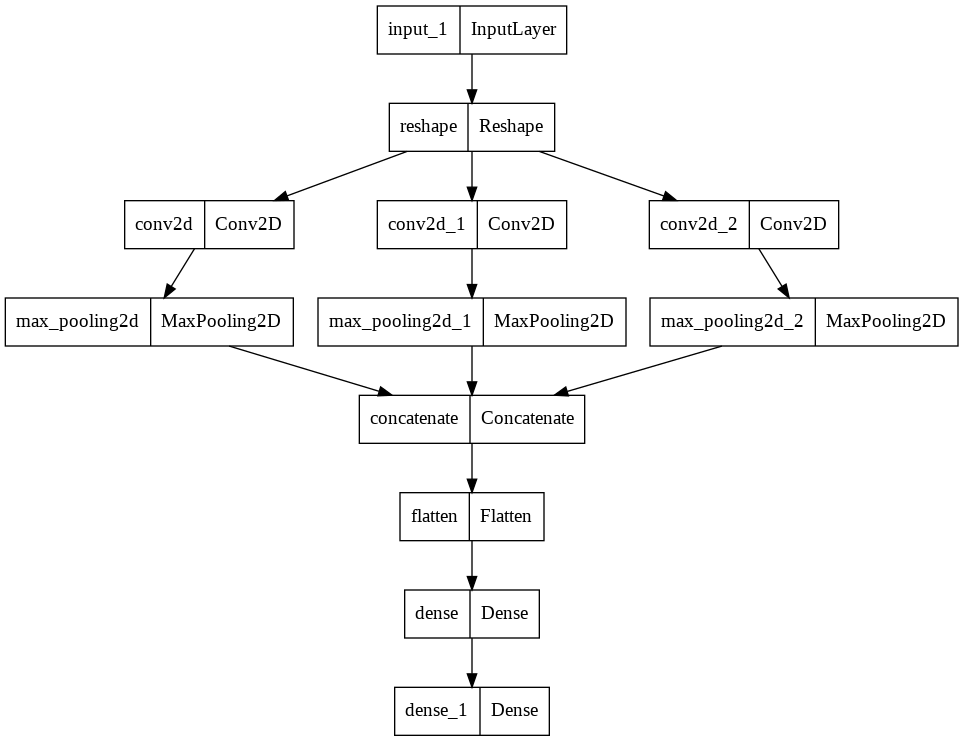

In [55]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [56]:
# let's split the data and train our model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_emb, y_encoded, test_size=.2)

In [57]:
# train our model
model.fit(x_train, y_train, epochs=23)

Epoch 1/23
366/366 [==============================] - 24s 60ms/step - loss: 0.5607 - acc: 0.7774
Epoch 2/23
366/366 [==============================] - 16s 43ms/step - loss: 0.4052 - acc: 0.8414
Epoch 3/23
366/366 [==============================] - 16s 43ms/step - loss: 0.2839 - acc: 0.8918
Epoch 4/23
366/366 [==============================] - 16s 44ms/step - loss: 0.1785 - acc: 0.9373
Epoch 5/23
366/366 [==============================] - 16s 45ms/step - loss: 0.1114 - acc: 0.9636
Epoch 6/23
366/366 [==============================] - 16s 43ms/step - loss: 0.0889 - acc: 0.9724
Epoch 7/23
366/366 [==============================] - 16s 45ms/step - loss: 0.0657 - acc: 0.9798
Epoch 8/23
366/366 [==============================] - 16s 43ms/step - loss: 0.0474 - acc: 0.9869
Epoch 9/23
366/366 [==============================] - 16s 43ms/step - loss: 0.0645 - acc: 0.9774
Epoch 10/23
366/366 [==============================] - 17s 46ms/step - loss: 0.0691 - acc: 0.9771
Epoch 11/23
366/366 [========

In [58]:
model.evaluate(x_test, y_test)

92/92 [==============================] - 3s 28ms/step - loss: 1.5332 - acc: 0.7975


[1.5332159996032715, 0.7974726557731628]

In [63]:
encoder.classes_[0]

-1

In [64]:
text = "Hello do you have python courses?"
text_v = np.zeros((1, longest_input, 300))
for i, token in enumerate(nlp(text)):
    if i>=longest_input:
        break
    text_v[0, i] = token.vector
predictions = model.predict(text_v)
predictions

array([[3.6614001e-05, 9.9996328e-01, 1.7817814e-07]], dtype=float32)

In [66]:
np.sum(predictions)

1.0

In [68]:
np.argmax(predictions)

1

In [69]:
np.max(predictions)

0.9999633

In [70]:
for label, prob in zip(encoder.classes_, predictions[0]):
    print((label, round(prob, 3)))

(-1, 0.0)
(0, 1.0)
(1, 0.0)


In [71]:
def predict_n_gram(text):
    text_v = np.zeros((1, longest_input, 300))
    for i, token in enumerate(nlp(text)):
        if i>=longest_input:
            break
        text_v[0, i] = token.vector
    # predict the input 
    prediction = model.predict(text_v)
    label = encoder.classes_[np.argmax(prediction)]
    return label

In [72]:
predict_n_gram("how much for the french course?")

0

Character embeddings for text classification
character level embedding can be very helpful as it tends to solve the typos issues and out of vocabulary words.




In [73]:
from collections import defaultdict
import string

# let's see how many unique characters we have!
unique_chars = len(string.ascii_letters+string.digits)
unique_chars

62

In [78]:
def get_longest_sequence(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text)
        longest_input = max(longest_input, text_len)
    return longest_input

In [80]:
longest_seq = get_longest_sequence(data['text'])
longest_seq

165

In [81]:
char2idx = defaultdict(lambda:0)

for idx, char in enumerate(string.ascii_letters+string.digits, 1):
    char2idx[char] = idx
    

In [82]:
char2idx['س']

0

In [83]:
char2idx['a']

1

In [84]:
def encode_text(text):
    text_v = np.zeros((longest_seq, unique_chars))
    for i, char in enumerate(text):
        if i<longest_seq:
            text_v[i, char2idx[char]] = 1
    return text_v

In [85]:
encode_text("abcd")

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
def encode_texts(texts):
    text_v = np.zeros((len(texts), longest_seq, unique_chars))
    for i, text in enumerate(texts):
        text_v[i] = encode_text(text)
    return text_v

In [91]:
data.head()

,airline_sentiment,text
0,0,what said
1,1,plus you ve added commercials to the experienc...
2,0,i didn t today must mean i need to take anothe...
3,-1,it s really aggressive to blast obnoxious ente...
4,-1,and it s a really big bad thing about it


In [92]:
x_encoded = encode_texts(data['text'])

IndexError: ignored

In [ ]:
x_encoded.shape